# Comment2Likes: Estimating Video Likes using Comment Data

### Problem Statement:

The objective of the "Comment2Likes: Estimating Video Likes using Comment Data" project is
to develop a predictive model that can estimate the number of likes a video will receive based
on the information extracted from its comments. By leveraging the valuable insights present in
user comments, this project aims to provide content creators, marketers, and platform
administrators with a tool to gauge the potential popularity of their videos and optimize their
content strategies accordingly.

## Import Libraries

In [1]:
#data manipulation
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for splitting data
from sklearn.model_selection import train_test_split

#scaling
from sklearn.preprocessing import StandardScaler

#regular expression
import re

#NLP
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#test vectorizer
from sklearn.feature_extraction.text import CountVectorizer

#algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


#Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avino\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\avino\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1.  Load Data

In [2]:
#data 1
video = pd.read_csv("videos-stats.csv")

In [3]:
# data 2 
comments = pd.read_csv("comments.csv")

## 2.View Data

###### Data 1

In [4]:
video.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


###### Data 2

In [5]:
comments.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


### 2.1 Data Shape

In [6]:
#check the shape of the data

#shape of video stats data
print("shape of video stats data : ", video.shape)

#shape of comments data
print("shape of comments data : ", comments.shape)

shape of video stats data :  (1881, 8)
shape of comments data :  (18409, 5)


### 2.2 Basic Information

In [7]:
#check for basic information of the data

#video data
print("video data : ", video.info())

print("\n") # for space between the 2 results

#comment data
print("comment data : ", comments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1881 non-null   int64  
 1   Title         1881 non-null   object 
 2   Video ID      1881 non-null   object 
 3   Published At  1881 non-null   object 
 4   Keyword       1881 non-null   object 
 5   Likes         1879 non-null   float64
 6   Comments      1879 non-null   float64
 7   Views         1879 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 117.7+ KB
video data :  None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18409 non-null  int64  
 1   Video ID    18409 non-null  object 
 2   Comment     18408 non-null  object 
 3   Likes       18409 non-null  float64
 4   Sentiment   18409 no

### 2.3 Statistical Information

In [8]:
#check for statistical  information of the data

In [9]:
#video data
video.describe()

,Unnamed: 0,Likes,Comments,Views
count,1881.000000,1.879000e+03,1879.000000,1.879000e+03
mean,940.000000,1.700610e+05,7863.331559,1.161292e+07
std,543.142247,7.962293e+05,37879.964926,1.084450e+08
min,0.000000,-1.000000e+00,-1.000000,2.500000e+01
25%,470.000000,2.672500e+03,199.000000,8.451500e+04
50%,940.000000,1.478700e+04,814.000000,5.917210e+05
75%,1410.000000,6.090600e+04,3377.500000,2.804978e+06
max,1880.000000,1.644556e+07,732818.000000,4.034122e+09


In [10]:
#comment data
comments.describe()

,Unnamed: 0,Likes,Sentiment
count,18409.000000,18409.000000,18409.000000
mean,9204.000000,1040.019447,1.493998
std,5314.364888,10651.366148,0.709928
min,0.000000,0.000000,0.000000
25%,4602.000000,5.000000,1.000000
50%,9204.000000,29.000000,2.000000
75%,13806.000000,190.000000,2.000000
max,18408.000000,891372.000000,2.000000


### 2.4 Duplicated Values

In [11]:
#check for duplicate values in the data

#video data
print("video data : ", video.duplicated().sum())

#comment data
print("comment data : ", comments.duplicated().sum())

video data :  0
comment data :  0


### 2.5 Null values

In [12]:
#check for null values in the data

#video data
print("video data : ", video.isnull().sum())

print("\n") # for space between the 2 results

#comment data
print("comment data : ", comments.isnull().sum())

video data :  Unnamed: 0      0
Title           0
Video ID        0
Published At    0
Keyword         0
Likes           2
Comments        2
Views           2
dtype: int64


comment data :  Unnamed: 0    0
Video ID      0
Comment       1
Likes         0
Sentiment     0
dtype: int64


we have a few null values which we will handle during data cleaning

## 3 Data Merging

since there are two datasets, it is neecessary to merge them. As they have a column c called VIDEO ID , we will merge the 2 data on video id column.

In [13]:
# Merge the 2 datasets on the 'Video ID' column
merged_data = pd.merge(video, comments, on='Video ID', how='inner')

# Display the merged data
merged_data.head()

,Unnamed: 0_x,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Unnamed: 0_y,Comment,Likes_y,Sentiment
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,1,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,2,I will forever acknowledge this channel with t...,161.0,2.0
3,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,3,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,4,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


### 3.1. check for the shape of the merged data

In [14]:
merged_data.shape

(18645, 12)

### 3.2. check for basic information

In [15]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18645 entries, 0 to 18644
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0_x  18645 non-null  int64  
 1   Title         18645 non-null  object 
 2   Video ID      18645 non-null  object 
 3   Published At  18645 non-null  object 
 4   Keyword       18645 non-null  object 
 5   Likes_x       18625 non-null  float64
 6   Comments      18625 non-null  float64
 7   Views         18625 non-null  float64
 8   Unnamed: 0_y  18645 non-null  int64  
 9   Comment       18644 non-null  object 
 10  Likes_y       18645 non-null  float64
 11  Sentiment     18645 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 1.8+ MB


### 3.3. check for statistical information

In [16]:
merged_data.describe()

,Unnamed: 0_x,Likes_x,Comments,Views,Unnamed: 0_y,Likes_y,Sentiment
count,18645.000000,1.862500e+04,18625.000000,1.862500e+04,18645.000000,18645.000000,18645.000000
mean,944.972003,1.753353e+05,8101.347973,1.174082e+07,9203.774739,1044.853955,1.495790
std,542.803157,8.047016e+05,38183.982425,1.088871e+08,5321.800497,10607.683576,0.708733
min,0.000000,-1.000000e+00,-1.000000,2.500000e+01,0.000000,0.000000,0.000000
25%,479.000000,2.786000e+03,216.000000,9.284100e+04,4583.000000,4.000000,1.000000
50%,948.000000,1.542500e+04,864.000000,6.173500e+05,9204.000000,29.000000,2.000000
75%,1416.000000,6.210300e+04,3501.000000,2.861258e+06,13817.000000,190.000000,2.000000
max,1880.000000,1.644556e+07,732818.000000,4.034122e+09,18408.000000,891372.000000,2.000000


### 3.4. check for duplicate values

In [17]:
merged_data.duplicated().sum()

0

### 3.5. check for null values

In [18]:
merged_data.isnull().sum()

Unnamed: 0_x     0
Title            0
Video ID         0
Published At     0
Keyword          0
Likes_x         20
Comments        20
Views           20
Unnamed: 0_y     0
Comment          1
Likes_y          0
Sentiment        0
dtype: int64

there area null values present which we will hanlde during data cleaning phase phase.

## 4. Data Cleaning

### 4.1 Remove unnecessary features

In [19]:
# Define the list of unnecessary columns to be dropped
unnecessary_columns = ['Unnamed: 0_x', 'Unnamed: 0_y',  'Published At']

# Drop the unnecessary columns from the merged dataset
merged_data = merged_data.drop(columns=unnecessary_columns)

# Display the filtered dataset
merged_data.head()

,Title,Video ID,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


### 4.2 Rename the columns

In [20]:
# Rename the columns in the merged dataset
merged_data = merged_data.rename(columns={'Likes_x': 'Video Likes', 'Likes_y': 'Comment Likes', 'Comments': 'No of Comments'})

# Display the updated dataset
merged_data.head()

,Title,Video ID,Keyword,Video Likes,No of Comments,Views,Comment,Comment Likes,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


### 4.3 handle Null Values 

In [21]:
#check for  null values
merged_data.isnull().sum()

Title              0
Video ID           0
Keyword            0
Video Likes       20
No of Comments    20
Views             20
Comment            1
Comment Likes      0
Sentiment          0
dtype: int64

In [22]:
#remove null values
merged_data= merged_data.dropna()

#check for null values after dropping them
merged_data.isnull().sum()

Title             0
Video ID          0
Keyword           0
Video Likes       0
No of Comments    0
Views             0
Comment           0
Comment Likes     0
Sentiment         0
dtype: int64

### 4.4 handle regular Expressions

In [23]:
#handle regular expressions in Title column for further analysis.

#view Title column
merged_data["Title"]

0        Apple Pay Is Killing the Physical Wallet After...
1        Apple Pay Is Killing the Physical Wallet After...
2        Apple Pay Is Killing the Physical Wallet After...
3        Apple Pay Is Killing the Physical Wallet After...
4        Apple Pay Is Killing the Physical Wallet After...
                               ...                        
18620    Andrew Ng: Deep Learning, Education, and Real-...
18621    Andrew Ng: Deep Learning, Education, and Real-...
18622    Andrew Ng: Deep Learning, Education, and Real-...
18623    Andrew Ng: Deep Learning, Education, and Real-...
18624    Andrew Ng: Deep Learning, Education, and Real-...
Name: Title, Length: 18624, dtype: object

In [25]:
def cleaned_title(title):
    # Remove numbers, symbols, and any characters other than A-Z and a-z alphabets
    cleaned_title = re.sub(r'[^A-Za-z]', ' ', title)
    
    return cleaned_title

# Apply the preprocessing function to the 'Comment' column
merged_data['Title'] = merged_data['Title'].apply(cleaned_title)

In [26]:
#print the cleaned Title column
merged_data["Title"]

0        Apple Pay Is Killing the Physical Wallet After...
1        Apple Pay Is Killing the Physical Wallet After...
2        Apple Pay Is Killing the Physical Wallet After...
3        Apple Pay Is Killing the Physical Wallet After...
4        Apple Pay Is Killing the Physical Wallet After...
                               ...                        
18620    Andrew Ng  Deep Learning  Education  and Real ...
18621    Andrew Ng  Deep Learning  Education  and Real ...
18622    Andrew Ng  Deep Learning  Education  and Real ...
18623    Andrew Ng  Deep Learning  Education  and Real ...
18624    Andrew Ng  Deep Learning  Education  and Real ...
Name: Title, Length: 18624, dtype: object

## 5. Exploratory Data Analysis

### 5.1. Data Types 

In [28]:
# check for data types of each feature
merged_data.dtypes

Title              object
Video ID           object
Keyword            object
Video Likes       float64
No of Comments    float64
Views             float64
Comment            object
Comment Likes     float64
Sentiment         float64
dtype: object

### 5.2 Unique values in each feature

In [29]:
merged_data.nunique()

Title              1840
Video ID           1867
Keyword              41
Video Likes        1827
No of Comments     1372
Views              1868
Comment           17974
Comment Likes      2539
Sentiment             3
dtype: int64

### 5.3. value counts in each feature

In [30]:
#number of unique values in Title column
merged_data["Title"].value_counts()

Champions Chess Tour  FTX Crypto Cup   Day     Commentary by David  Jovanka  Kaja  amp  Simon     60
Python Machine Learning Tutorial  Data Science                                                    40
Vikram Vedha Movie Teaser Review   KRK    krkreview  bollywood  latestreviews  review  hrithik    40
How to Solve a Rubik     s Cube   WIRED                                                           40
Computer Scientist Explains Machine Learning in   Levels of Difficulty   WIRED                    40
                                                                                                  ..
Grey Literature                                                                                    1
How to Create Weekly Planner For Business   Canva For Beginners                                    1
Seven Steps to Financial Wellness   Arpit Arora   TEDxChowringhee                                  1
Tech firms can     t hide behind advertising rules with financial products  says CFPB chief

In [31]:
#number of unique values in Video ID column
merged_data["Video ID"].value_counts()

ZgeorpjGJC0    40
7eh4d6sabA0    40
96mrgd8-3yE    40
R-R0KrXvWbc    40
RFMi3v0TXP8    40
               ..
7RvBj9r5Dhg     1
voU9-39bicg     1
V_vguZj_7FE     1
4PpkuBUqmkk     1
oXGVGXAx9Ng     1
Name: Video ID, Length: 1867, dtype: int64

In [32]:
#number of unique values in Views column
merged_data["Views"].value_counts()

1564007.0     40
51885.0       40
1204024.0     40
14537.0       40
29905105.0    40
              ..
867.0          1
4114.0         1
52046148.0     1
62189.0        1
31343.0        1
Name: Views, Length: 1868, dtype: int64

In [33]:
#number of unique values in Video Likes column
merged_data["Video Likes"].value_counts()

-1.0         80
 406.0       40
 63825.0     40
 563.0       40
 329.0       40
             ..
 280080.0     1
 37.0         1
 2184.0       1
 15.0         1
 38.0         1
Name: Video Likes, Length: 1827, dtype: int64

In [34]:
#number of unique values in Comment Likes column
merged_data["Comment Likes"].value_counts()

0.0       1500
1.0       1055
2.0        857
3.0        644
4.0        612
          ... 
731.0        1
2829.0       1
1086.0       1
1174.0       1
2111.0       1
Name: Comment Likes, Length: 2539, dtype: int64

In [35]:
#number of unique values in No of Comments column
merged_data["No of Comments"].value_counts()

29.0      90
16.0      77
21.0      75
173.0     70
32.0      65
          ..
280.0      8
6907.0     6
1004.0     3
67.0       2
7414.0     1
Name: No of Comments, Length: 1372, dtype: int64

### 5.4. Visualizations

#### 5.4.1 Analyze the Distribution of Likes, Comments, and Views:

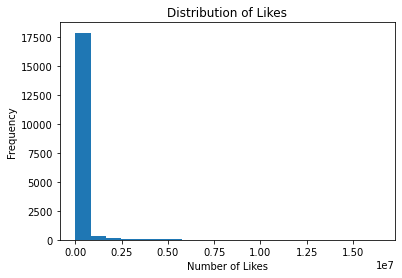

In [36]:
# Plot the distribution of Likes on videos
plt.hist(merged_data['Video Likes'], bins=20)
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')
plt.show()

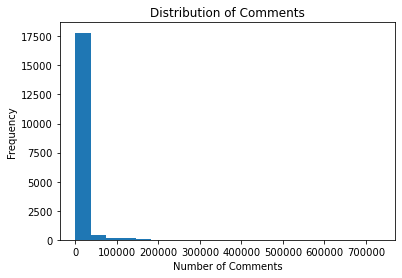

In [37]:
# Plot the distribution of Comments
plt.hist(merged_data['No of Comments'], bins=20)
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.title('Distribution of Comments')
plt.show()

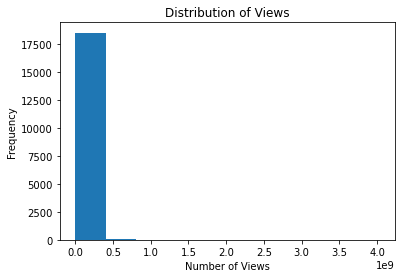

In [38]:
# Plot the distribution of Views
plt.hist(merged_data['Views'])
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.title('Distribution of Views')
plt.show()

#### 5.4.2 Analyze Comment Sentiment

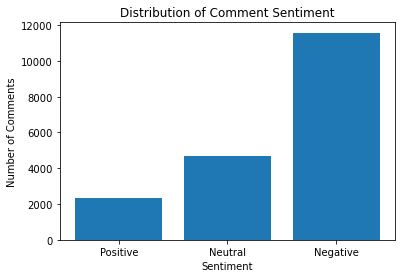

In [39]:
# Count the number of comments for each sentiment category
sentiment_counts = merged_data['Sentiment'].value_counts()

# Create a bar chart of sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Distribution of Comment Sentiment')
plt.xticks(sentiment_counts.index, ['Negative', 'Neutral', 'Positive'])
plt.show()


#### 5.4.3 Explore the Relationship between Likes and Comment Likes

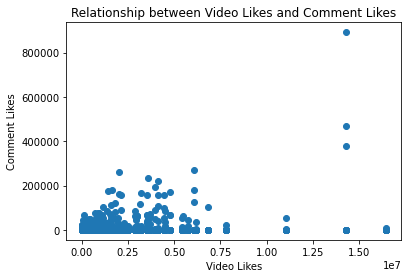

In [40]:
# Create a scatter plot of Likes on videos  vs Likes on comments
plt.scatter(merged_data['Video Likes'], merged_data['Comment Likes'])
plt.xlabel('Video Likes')
plt.ylabel('Comment Likes')
plt.title('Relationship between Video Likes and Comment Likes')
plt.show()


#### 5.4.4 Explore the Relationship between views and number of comments

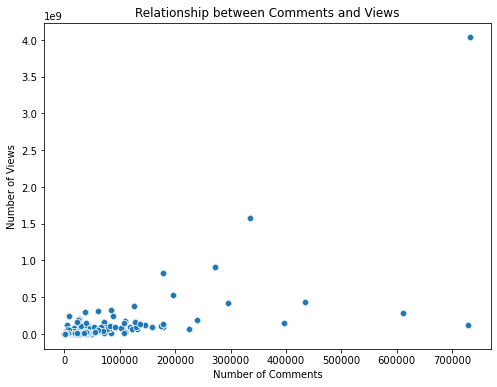

In [41]:
# Create a scatter plot of 'No of Comments' vs 'Views'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='No of Comments', y='Views')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Views')
plt.title('Relationship between Comments and Views')
plt.show()


#### 5.4.5 unique  keywords

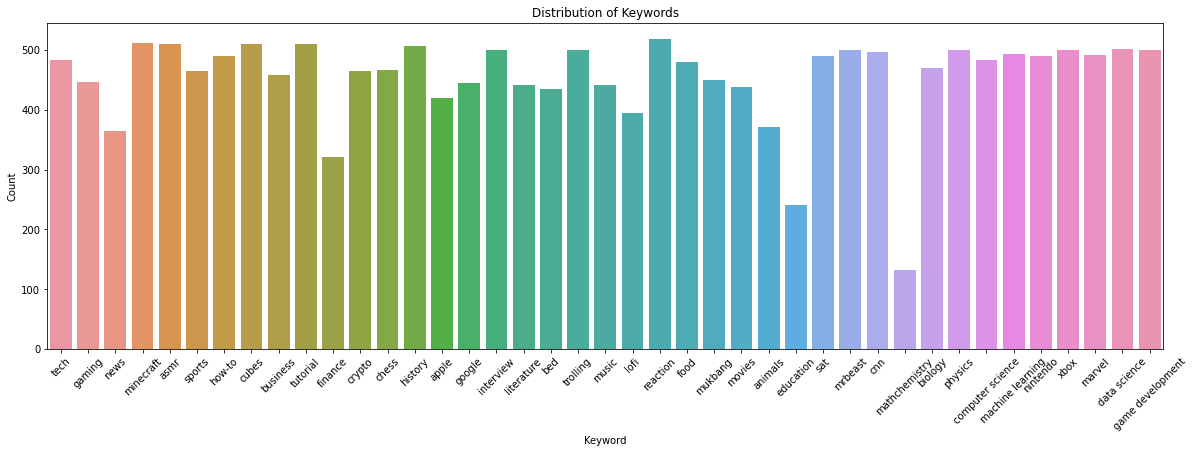

In [42]:
# Plot the value counts of 'Keywords'
plt.figure(figsize=(20, 6))
sns.countplot(data=merged_data, x='Keyword')
plt.xticks(rotation=45)
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title('Distribution of Keywords')
plt.show()

## 5.5 Insights

### 5.5.1 Title which has highest and lowest number of comments?

In [43]:
# Group the data by 'Title' and calculate the sum of 'No of Comments' 
title_comment_counts = merged_data.groupby('Title')['No of Comments'].sum()


# Find the title with the highest and lowest comment counts
title_highest_comments = title_comment_counts.idxmax()
title_lowest_comments = title_comment_counts.idxmin()



print("Title with the highest number of comments:", title_highest_comments)
print("\n")
print("Title with the lowest number of comments:", title_lowest_comments)



Title with the highest number of comments: El Chombo   Dame Tu Cosita feat  Cutty Ranks  Official Video   Ultra Music 


Title with the lowest number of comments: BEST Auditions Of Songs From Movies   Amazing Auditions


### 5.5.2 Title which has highest and lowest number of views?

In [44]:
# Group the data by 'Title' and calculate the sum of   'Views'
title_view_counts = merged_data.groupby('Title')['Views'].sum()

# Find the title with the highest and lowest view counts
title_highest_views = title_view_counts.idxmax()
title_lowest_views = title_view_counts.idxmin()

print("Title with the highest number of views:", title_highest_views)
print("\n")
print("Title with the lowest number of views:", title_lowest_views)

Title with the highest number of views: El Chombo   Dame Tu Cosita feat  Cutty Ranks  Official Video   Ultra Music 


Title with the lowest number of views: Mathematics and Chemistry   MathChemistry com   Masters Degree in Math


### 5.5.3 Title with most positive, negative and neutral sentiments?

In [45]:
# Group the data by 'Title' and calculate the value counts of 'Sentiment'
title_sentiment_counts = merged_data.groupby('Title')['Sentiment'].value_counts()

# Find the title with the most negative sentiment
title_most_negative_sentiment = title_sentiment_counts.xs(0, level='Sentiment').idxmax()

# Find the title with the most positive sentiment
title_most_positive_sentiment = title_sentiment_counts.xs(2, level='Sentiment').idxmax()

# Find the title with the most neutral sentiment
title_most_neutral_sentiment = title_sentiment_counts.xs(1, level='Sentiment').idxmax()

print("Title with the most negative sentiment:", title_most_negative_sentiment)
print("\n")
print("Title with the most positive sentiment:", title_most_positive_sentiment)
print("\n")
print("Title with the most neutral sentiment:", title_most_neutral_sentiment)


Title with the most negative sentiment: Nightly News Full Broadcast   Aug    


Title with the most positive sentiment: Champions Chess Tour  FTX Crypto Cup   Day     Commentary by David  Jovanka  Kaja  amp  Simon


Title with the most neutral sentiment:   D P CHEZ VOUS   Ces PROMOS disparaissent bient t du PS Store  Xbox Store  Nintendo eShop   


### 5.5.4 Title which has highest and lowest number of likes?

In [46]:
# Find the title with the highest number of likes
title_highest_likes = merged_data.loc[merged_data['Video Likes'].idxmax(), 'Title']

# Find the title with the lowest number of likes
title_lowest_likes = merged_data.loc[merged_data['Video Likes'].idxmin(), 'Title']

print("Title with the highest number of likes:", title_highest_likes)
print("\n")
print("Title with the lowest number of likes:", title_lowest_likes)


Title with the highest number of likes: El Chombo   Dame Tu Cosita feat  Cutty Ranks  Official Video   Ultra Music 


Title with the lowest number of likes: How To Build A Business That Works   Brian Tracy  GENIUS


###  Remove unnecessary columns

In [47]:
# Define the list of unnecessary columns to be dropped
unnecessary_columns = ['Title', 'Video ID',  'Keyword']

# Drop the unnecessary columns from the merged dataset
merged_data = merged_data.drop(columns=unnecessary_columns)

# Display the filtered dataset
merged_data.head()

,Video Likes,No of Comments,Views,Comment,Comment Likes,Sentiment
0,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


## 6. Define X and y

the target variable of the project is Video likes.

In [48]:
# Define X (features)
X = merged_data.drop('Video Likes', axis=1)

# Define y (target variable)
y = merged_data['Video Likes']


In [49]:
#view X
X

,No of Comments,Views,Comment,Comment Likes,Sentiment
0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0
...,...,...,...,...,...
18620,443.0,226152.0,As a GenX'er I enjoyed this interview so much....,21.0,2.0
18621,443.0,226152.0,I took Ng's class on Coursera years ago. It sw...,159.0,2.0
18622,443.0,226152.0,This man got a great voiceover career availabl...,66.0,2.0
18623,443.0,226152.0,This week has been awesome! First Scott Aarons...,26.0,2.0


In [50]:
#view y
y

0        3407.0
1        3407.0
2        3407.0
3        3407.0
4        3407.0
          ...  
18620    5198.0
18621    5198.0
18622    5198.0
18623    5198.0
18624    5198.0
Name: Video Likes, Length: 18624, dtype: float64

## 8. Preprocessing

### 8.1. cleaning text (removing stopwords and lemmatizing)

In [51]:
def preprocess_comment(comment):
    # Remove numbers, symbols, and any characters other than A-Z and a-z alphabets
    processed_comment = re.sub(r'[^A-Za-z]', ' ', comment)
    
    # Remove extra spaces
    processed_comment = re.sub(r'\s+', ' ', processed_comment).strip()
    
    # Convert to lowercase
    processed_comment = processed_comment.lower()
    
    # Remove stopwords using NLTK
    stop_words = set(stopwords.words('english'))
    processed_comment = ' '.join(word for word in processed_comment.split() if word not in stop_words)
    
    # Lemmatize using NLTK
    lemmatizer = WordNetLemmatizer()
    processed_comment = ' '.join(lemmatizer.lemmatize(word) for word in processed_comment.split())
    
    return processed_comment


In [52]:
# Apply preprocessing function to the 'Comment' column
X['Comment'] = X['Comment'].apply(preprocess_comment)

In [53]:
#print the comment column to check
X["Comment"]

0        let forget apple pay required brand new iphone...
1        nz retailer even contactless credit card machi...
2        forever acknowledge channel help lesson idea e...
3        whenever go place take apple pay happen often ...
4        apple pay convenient secure easy use used kore...
                               ...                        
18620    genx er enjoyed interview much made actually f...
18621    took ng class coursera year ago switched caree...
18622     man got great voiceover career available anytime
18623    week awesome first scott aaronson andrew ng le...
18624    im physician brazil learning ai fine man helpe...
Name: Comment, Length: 18624, dtype: object

## 8.2 Vectorize the text

### Count Vectorizer

from sklearn.feature_extraction.text import CountVectorizer

In [55]:
# Initialize the CountVectorizer with adjusted parameters
vectorizer = CountVectorizer(max_features=3000, ngram_range=(1, 2), stop_words='english')

# Fit and transform the 'Comment' column
X_vectorized = vectorizer.fit_transform(X["Comment"])

X_vectorized = X_vectorized.toarray()
X_vectorized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
# Create a DataFrame with the vectorized comments
X_vectorized = pd.DataFrame(X_vectorized, columns=vectorizer.get_feature_names())
X_vectorized

C:\Users\avino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abian,abian apreciado,ability,able,absolute,absolutely,absolutely amazing,absolutely love,academic,academy,...,youtuber,youtubers,yr,yummy,zach,zero,zifn,zifn son,zombie,zoom
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18620,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 8.2.1 merge original data with the vectorized data

In [57]:
#reset index for X data
X.reset_index(drop = True, inplace = True)
X

,No of Comments,Views,Comment,Comment Likes,Sentiment
0,672.0,135612.0,let forget apple pay required brand new iphone...,95.0,1.0
1,672.0,135612.0,nz retailer even contactless credit card machi...,19.0,0.0
2,672.0,135612.0,forever acknowledge channel help lesson idea e...,161.0,2.0
3,672.0,135612.0,whenever go place take apple pay happen often ...,8.0,0.0
4,672.0,135612.0,apple pay convenient secure easy use used kore...,34.0,2.0
...,...,...,...,...,...
18619,443.0,226152.0,genx er enjoyed interview much made actually f...,21.0,2.0
18620,443.0,226152.0,took ng class coursera year ago switched caree...,159.0,2.0
18621,443.0,226152.0,man got great voiceover career available anytime,66.0,2.0
18622,443.0,226152.0,week awesome first scott aaronson andrew ng le...,26.0,2.0


In [58]:
#reset index for X["Comment"] data
X_vectorized.reset_index(drop = True, inplace = True)
X_vectorized

,abian,abian apreciado,ability,able,absolute,absolutely,absolutely amazing,absolutely love,academic,academy,...,youtuber,youtubers,yr,yummy,zach,zero,zifn,zifn son,zombie,zoom
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18620,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Concatenate the vectorized comments with the original data
final_data = pd.concat([X, X_vectorized], axis=1)
final_data.head()

,No of Comments,Views,Comment,Comment Likes,Sentiment,abian,abian apreciado,ability,able,absolute,...,youtuber,youtubers,yr,yummy,zach,zero,zifn,zifn son,zombie,zoom
0,672.0,135612.0,let forget apple pay required brand new iphone...,95.0,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,672.0,135612.0,nz retailer even contactless credit card machi...,19.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,672.0,135612.0,forever acknowledge channel help lesson idea e...,161.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,672.0,135612.0,whenever go place take apple pay happen often ...,8.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,672.0,135612.0,apple pay convenient secure easy use used kore...,34.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Remove Comment Column

In [60]:
#remove comment column
final_data = final_data.drop(columns = "Comment")
final_data

,No of Comments,Views,Comment Likes,Sentiment,abian,abian apreciado,ability,able,absolute,absolutely,...,youtuber,youtubers,yr,yummy,zach,zero,zifn,zifn son,zombie,zoom
0,672.0,135612.0,95.0,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,672.0,135612.0,19.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,672.0,135612.0,161.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,672.0,135612.0,8.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,672.0,135612.0,34.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18619,443.0,226152.0,21.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18620,443.0,226152.0,159.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18621,443.0,226152.0,66.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18622,443.0,226152.0,26.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 9. Train Test Split

In [61]:
#split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(final_data, y ,test_size = 0.2, random_state = 5)

## 10. Scaling 

from sklearn.preprocessing import StandardScaler

In [62]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Perform scaling on the train dataset
X_train = scaler.fit_transform(X_train)

# Perform scaling on the train dataset
X_test = scaler.transform(X_test)

In [63]:
# view X_train
X_train

array([[-2.02741844e-01, -1.06505998e-01, -9.02144109e-02, ...,
        -3.06682926e-02, -2.56553153e-02, -3.49546735e-02],
       [ 2.31726361e-02, -9.69504073e-02, -7.41924399e-02, ...,
        -3.06682926e-02, -2.56553153e-02, -3.49546735e-02],
       [-2.10994181e-01, -1.07626654e-01, -9.33297941e-02, ...,
        -3.06682926e-02, -2.56553153e-02, -3.49546735e-02],
       ...,
       [ 1.95484458e+01,  3.69740178e+01, -9.25286956e-02, ...,
        -3.06682926e-02, -2.56553153e-02, -3.49546735e-02],
       [-1.98966265e-01, -1.06018572e-01, -9.30627613e-02, ...,
        -3.06682926e-02, -2.56553153e-02, -3.49546735e-02],
       [ 1.14824131e+00,  1.54873746e-01, -7.73078231e-02, ...,
        -3.06682926e-02, -2.56553153e-02, -3.49546735e-02]])

In [64]:
# view X_test
X_test

array([[-0.20608593, -0.10489155, -0.09306276, ..., -0.03066829,
        -0.02565532, -0.03495467],
       [-0.05198836, -0.02553341,  0.37985242, ..., -0.03066829,
        -0.02565532, -0.03495467],
       [-0.04993876, -0.07010719, -0.09306276, ..., -0.03066829,
        -0.02565532, -0.03495467],
       ...,
       [-0.17847026, -0.05492154, -0.0917276 , ..., -0.03066829,
        -0.02565532, -0.03495467],
       [-0.17512618,  0.03778355, -0.09324078, ..., -0.03066829,
        -0.02565532, -0.03495467],
       [-0.16485121, -0.10450328, -0.08692101, ..., -0.03066829,
        -0.02565532, -0.03495467]])

## 11. Model Traininig and Evaluation

### Decision Tree Regressor

In [68]:
# Create and fit the Decision Tree Regression model
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)


# Evaluate the model

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2-score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)


Mean Squared Error (MSE): 780026413.0198358
Mean Absolute Error (MAE): 2546.195794183445
R2-score: 0.9988116910680711


### Random Forest Regressor

In [69]:
# Create and fit the Random Forest Regression model
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2-score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)


Mean Squared Error (MSE): 1124419410.1366446
Mean Absolute Error (MAE): 7154.453712550044
R2-score: 0.998287035405472


### Gradient Boosting Regressor

In [67]:
# Create the Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()

# Fit the model on the training data
gb_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_reg.predict(X_test)

# Evaluate the model

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2-score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)


Mean Squared Error (MSE): 7387141277.983803
Mean Absolute Error (MAE): 33273.009188345066
R2-score: 0.9887462708755405


## 12. Model Comparison

Based on the evaluation metrics , here's a comparison of the performance of the three models:

Decision Tree:

    Mean Squared Error (MSE): 780026413.0198358
    Mean Absolute Error (MAE): 2546.195794183445
    R2-score: 0.9988116910680711
    
Random Forest:

    Mean Squared Error (MSE): 1124419410.1366446
    Mean Absolute Error (MAE): 7154.453712550044
    R2-score: 0.998287035405472
    
Gradient Boosting:

    Mean Squared Error (MSE): 7387141277.983803
    Mean Absolute Error (MAE): 33273.009188345066
    R2-score: 0.9887462708755405
    
Based on these results, the Decision Tree and Random Forest models outperform the Gradient Boosting model in terms of MSE, MAE, and R2-score. Both Decision Tree and Random Forest have similar R2-scores, indicating a good fit to the data.

In terms of model selection, it is important to consider the trade-off between performance and complexity. The Decision Tree model tends to be simpler and more interpretable compared to the Random Forest, as it consists of a single tree. However, the Random Forest model typically provides better generalization and robustness by combining multiple decision trees.

Therefore, considering the overall performance and generalization ability, the Random Forest model appears to be the better choice among the three models.  Additionally, Random Forests are less prone to overfitting and can handle larger datasets effectively.


## Final Model

after comparing these 3 different models Random Forest Regressor is chosen as the final model

In [72]:
# Create and fit the Random Forest Regression model
final_model = RandomForestRegressor()
final_model.fit(X_train, y_train)

# Predict on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2-score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)

Mean Squared Error (MSE): 1129332522.523951
Mean Absolute Error (MAE): 7159.852608044105
R2-score: 0.9982795506649095


## Conclusion

The project involved several steps including data cleaning, exploratory data analysis (EDA), preprocessing, vectorization, scaling, fitting models, and model comparison. The Random Forest model was selected as the final model. Here's a summary of the project steps and the conclusion:

1. Data Cleaning: The initial dataset likely required cleaning to handle missing values, duplicates, or any inconsistencies in the data.

2. Exploratory Data Analysis (EDA): EDA was performed to gain insights into the data, understand the distributions, identify correlations, and extract meaningful features.

3. Preprocessing: The data preprocessing step involved removing regular expressions, such as numbers and symbols, from the text data. Stop words were removed using NLTK, and lemmatization was applied using NLTK and spaCy to reduce words to their base or root form.

4. Vectorization: The preprocessed text data was converted into a numerical representation suitable for machine learning algorithms. CountVectorizer was used to convert the text into a matrix of token counts.

5. Scaling: If necessary, feature scaling techniques such as StandardScaler or MinMaxScaler might have been applied to normalize the numerical features.

6. Fitting Models: The preprocessed and vectorized data, along with the corresponding labels, were split into training and testing sets. The Random Forest model was trained using the training data.

7. Model Comparison: The performance of multiple models, such as Decision Tree and Random Forest, was evaluated using evaluation metrics like Mean Squared Error (MSE) and Mean Absolute Error (MAE). The Random Forest model demonstrated better performance compared to the Decision Tree model.

8. Final Model Selection: Based on the comparison, the Random Forest model was selected as the final model due to its superior performance in terms of MSE and MAE and R2 score.

In conclusion, through the steps of data cleaning, EDA, preprocessing, vectorization, scaling, fitting models, and model comparison, the Random Forest model emerged as the best choice for the given task. 

### Project by

Vinodhini Rajamanickam

Data Science student